In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Mendelian simulations

In [2]:
num_sims = 100000
num_ofs = 20

0


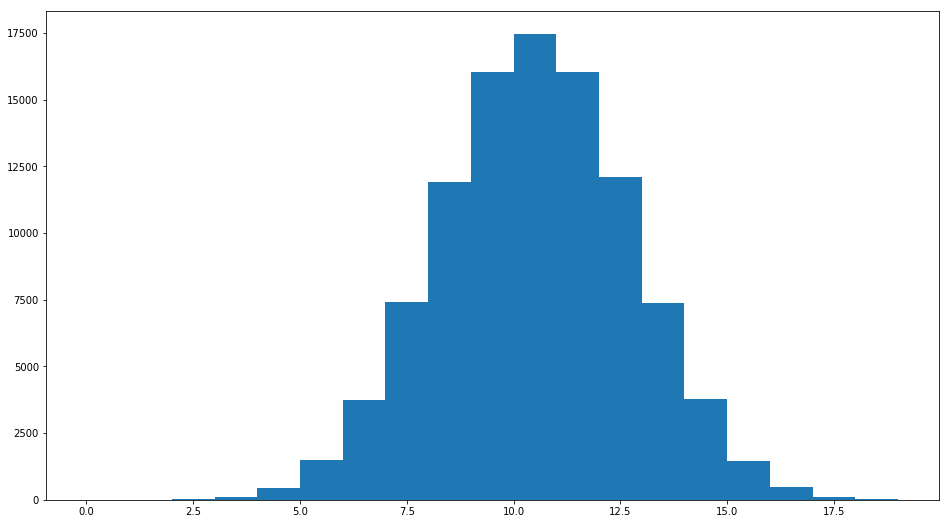

In [3]:
num_hets_AA_AT = []
for sim in range(num_sims):
    sim_hets = 0
    for ofs in range(20):
        sim_hets += 1 if random.choice([0, 1]) == 1 else 0
    num_hets_AA_AT.append(sim_hets)
    
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.hist(num_hets_AA_AT, bins=range(20))
print(len([num_hets for num_hets in num_hets_AA_AT if num_hets==20]))

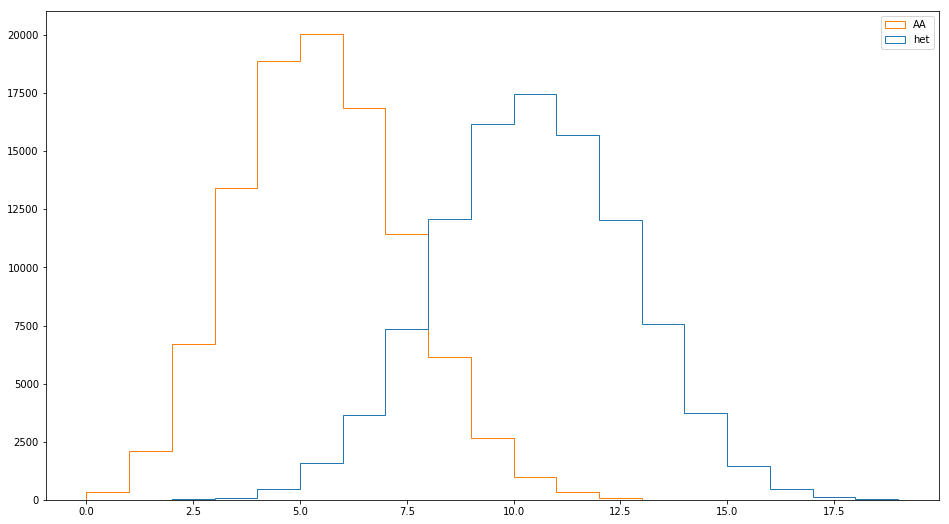

In [4]:
num_AAs_AT_AT = []
num_hets_AT_AT = []
for sim in range(num_sims):
    sim_AAs = 0
    sim_hets = 0
    for ofs in range(20):
        derived_cnt = sum(random.choices([0, 1], k=2))
        sim_AAs += 1 if derived_cnt == 0 else 0
        sim_hets += 1 if derived_cnt == 1 else 0
    num_AAs_AT_AT.append(sim_AAs)
    num_hets_AT_AT.append(sim_hets)
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.hist([num_hets_AT_AT, num_AAs_AT_AT], histtype='step', fill=False, bins=range(20), label=['het', 'AA'])
plt.legend()

# Balanced output

In [1]:
import gzip
import pickle
import random

import numpy as np

In [2]:
mendelian_errors = pickle.load(gzip.open('mendelian_errors.pickle.gz', 'rb'))
feature_fit = np.load(gzip.open('feature_fit.npy.gz', 'rb'))
ordered_features = np.load(open('ordered_features', 'rb'))
num_features = len(ordered_features)

In [3]:
len(mendelian_errors), len(list(filter(lambda x: x[0] > 0,mendelian_errors.values())))

(10905732, 541688)

In [4]:
total_observations = len(mendelian_errors)
error_observations = len(list(filter(lambda x: x[0] > 0,mendelian_errors.values())))
ok_observations = total_observations - error_observations
fraction_errors = error_observations/total_observations
print (total_observations, ok_observations, error_observations, 100*fraction_errors)
del mendelian_errors

10905732 10364044 541688 4.9670026734564905


In [6]:
prob_ok_choice = error_observations / ok_observations

def accept_entry(row):
    if row[-1] == 1:
        return True
    return random.random() <= prob_ok_choice

accept_entry_v = np.vectorize(accept_entry, signature='(i)->()')

accepted_entries = accept_entry_v(feature_fit)
balanced_fit = feature_fit[accepted_entries]
del feature_fit
balanced_fit.shape
len([x for x in balanced_fit if x[-1] == 1]), len([x for x in balanced_fit if x[-1] == 0])

(541688, 541287)

In [7]:
np.save(gzip.open('balanced_fit.npy.gz', 'wb'), balanced_fit, allow_pickle=False, fix_imports=False)